In [1]:
import pandas as pd
import numpy as np

In [ ]:
car_prices_df = pd.read_csv('car_prices_fixed.csv')
car_prices_df = car_prices_df.dropna()
print(car_prices_df.head())

#different body styles/colors

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca        4.5    1331.0   gray    black   
3  yv1612tb4f1310987    ca        4.1   14282.0  white    black   
4  wba6b2c57ed129731    ca        4.3    2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, 

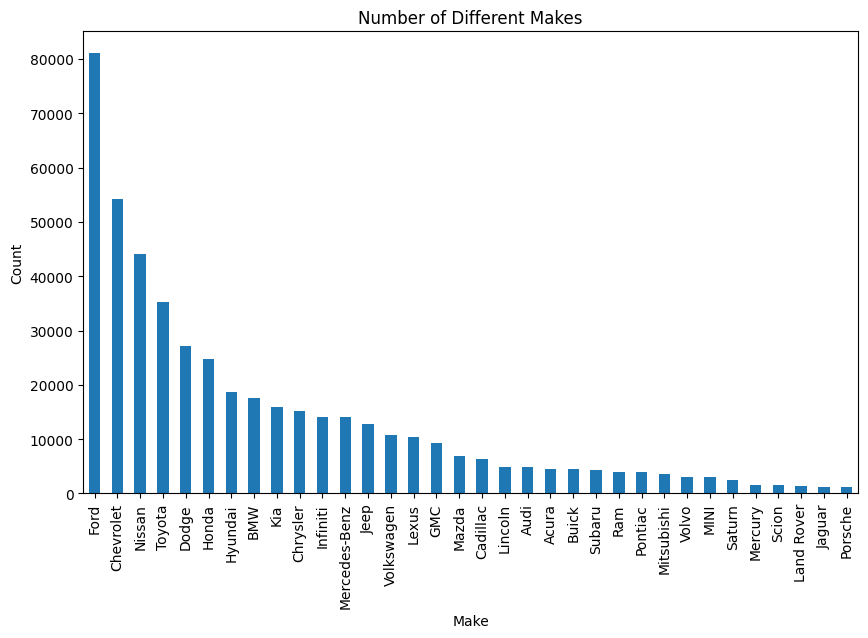

In [16]:
import matplotlib.pyplot as plt

# Count the occurrences of each make
make_counts = car_prices_df['make'].value_counts()

make_counts = make_counts[make_counts >= 1000]

# Plot the result
make_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Different Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

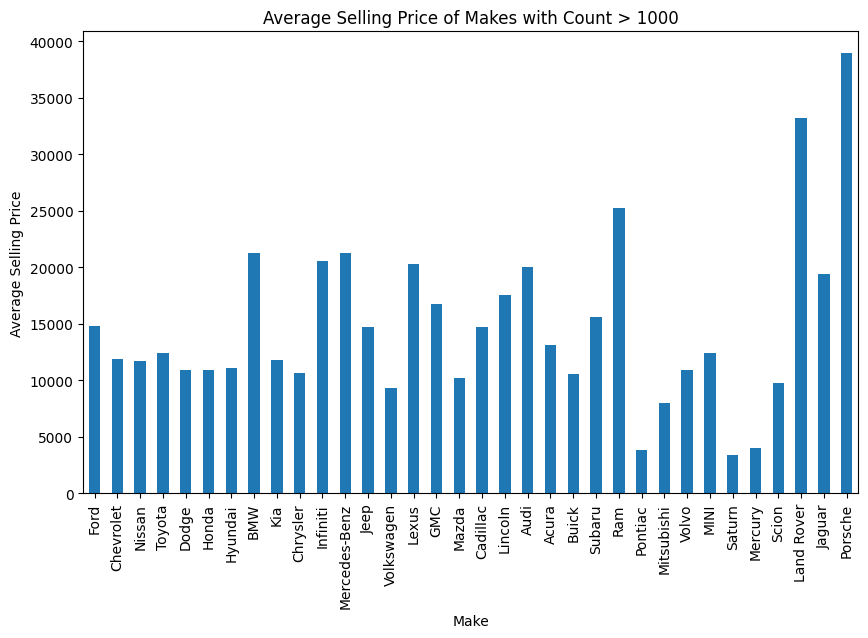

In [17]:
# Filter the dataframe to include only makes with count > 1000
filtered_df = car_prices_df[car_prices_df['make'].isin(make_counts.index)]

# Calculate the average selling price for each make
average_price = filtered_df.groupby('make')['sellingprice'].mean()

# Filter the average price to include only makes with count > 1000
average_price = average_price[make_counts.index]

# Plot the result
plt.figure(figsize=(10, 6))
average_price.plot(kind='bar')
plt.title('Average Selling Price of Makes with Count > 1000')
plt.xlabel('Make')
plt.ylabel('Average Selling Price')
plt.show()

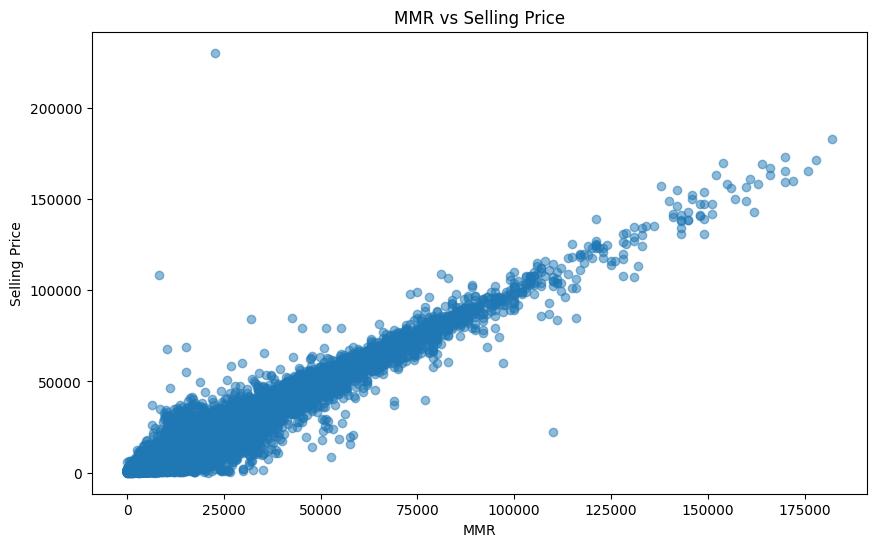

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(car_prices_df['mmr'], car_prices_df['sellingprice'], alpha=0.5)
plt.title('MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()
## outlier

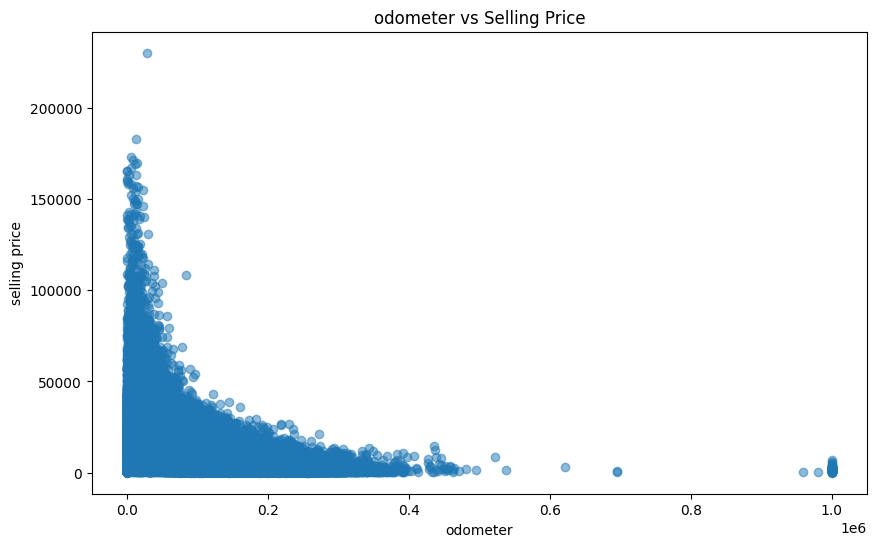

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(car_prices_df['odometer'], car_prices_df['sellingprice'], alpha=0.5)
plt.title('odometer vs Selling Price')
plt.xlabel('odometer')
plt.ylabel('selling price')
plt.show()

[[25562 10194]
 [ 5883 52829]]
              precision    recall  f1-score   support

       False       0.81      0.71      0.76     35756
        True       0.84      0.90      0.87     58712

    accuracy                           0.83     94468
   macro avg       0.83      0.81      0.81     94468
weighted avg       0.83      0.83      0.83     94468



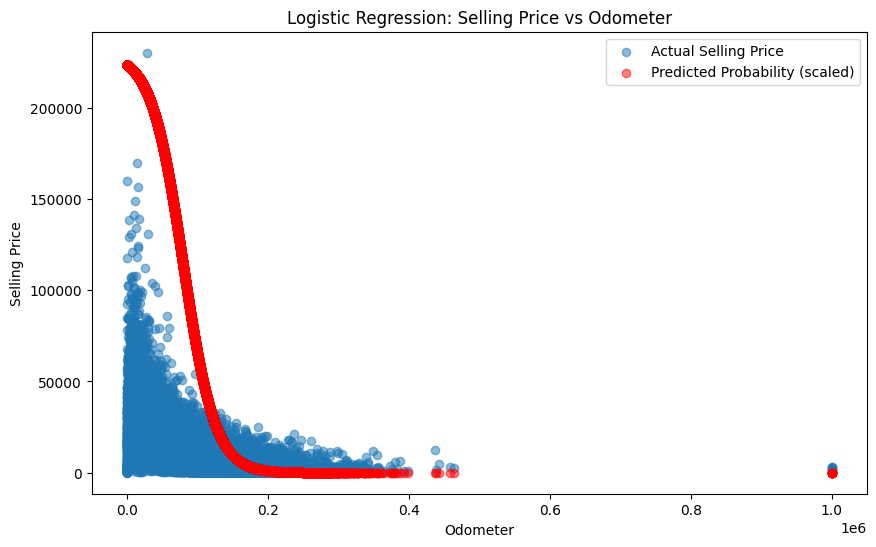

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Prepare the data
X = car_prices_df[['odometer']]
y = car_prices_df['sellingprice'] > 10000  # Binary classification target
actual_prices = car_prices_df['sellingprice']  # Keep original prices for visualization

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, prices_train, prices_test = train_test_split(
    X, y, actual_prices, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions and compute probabilities
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the actual selling prices and probabilities
plt.figure(figsize=(10, 6))
plt.scatter(X_test['odometer'], prices_test, alpha=0.5, label='Actual Selling Price')
plt.scatter(X_test['odometer'], y_prob * prices_test.max(), alpha=0.5, label='Predicted Probability (scaled)', color='red')
plt.title('Logistic Regression: Selling Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


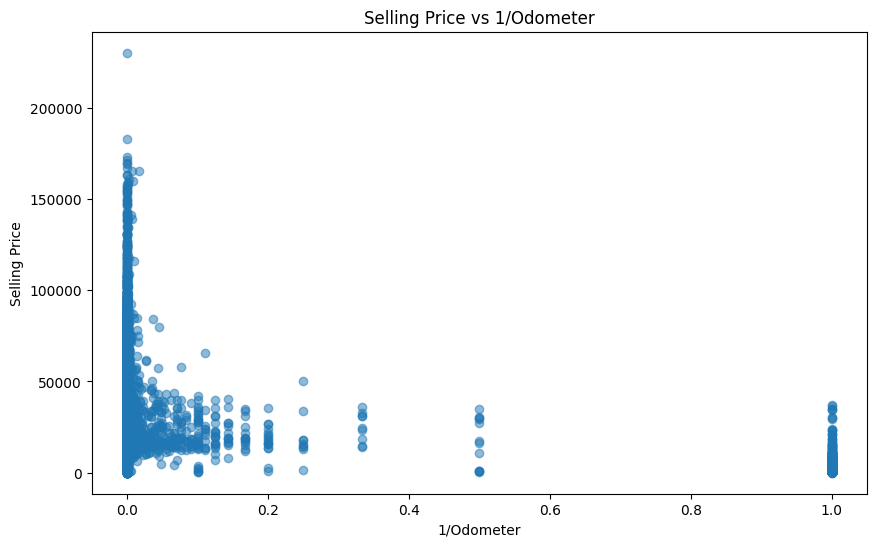

In [13]:
# Calculate the inverse of the odometer
car_prices_df['inverse_odometer'] = 1 / car_prices_df['odometer']

# Plot the result
plt.figure(figsize=(10, 6))
plt.scatter(car_prices_df['inverse_odometer'], car_prices_df['sellingprice'], alpha=0.5)
plt.title('Selling Price vs 1/Odometer')
plt.xlabel('1/Odometer')
plt.ylabel('Selling Price')
plt.show()

C:\Users\ericy\AppData\Local\Temp\ipykernel_37400\3055309788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['inverse_odometer'] = 1 / X['odometer']


Coefficients: [-10902.80312437]
Intercept: 13714.278225670856
R^2 score: 0.0028826619541396648


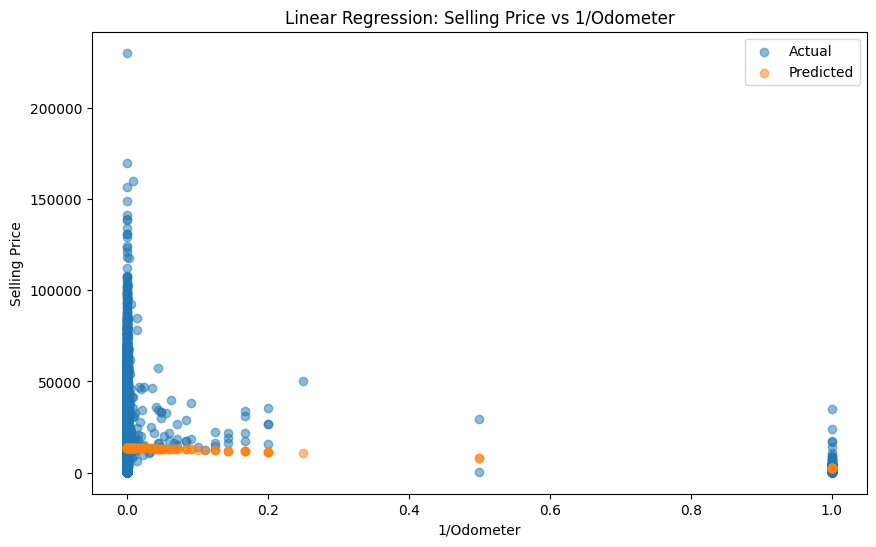

In [21]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = car_prices_df[['odometer']]
y = car_prices_df['sellingprice']

# Calculate the inverse of the odometer
X['inverse_odometer'] = 1 / X['odometer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[['inverse_odometer']], y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X_test, y_test)}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['inverse_odometer'], y_test, alpha=0.5, label='Actual')
plt.scatter(X_test['inverse_odometer'], y_pred, alpha=0.5, label='Predicted')
plt.title('Linear Regression: Selling Price vs 1/Odometer')
plt.xlabel('1/Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()